# <img style="float: left; padding-right: 20px; height: 70px" src="https://i.imgur.com/cMzxwTN.jpg"> Fundamentos de Machine Learning
## Actividad I, Sesion 4

**Universidad Privada Boliviana**<br/>
**Experto en machine learning y ciencia de datos**<br/>


In [1]:

%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import metrics
import scipy.optimize as opt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#F7345E','#80C3BD'])
cmap_light = ListedColormap(['#FFF4E5','#D2E3EF'])


In [2]:
# Lea el archivo 'agriland.csv' como un Pandas dataframe
df = pd.read_csv('agriland.csv')

# Observe los datos importados

df.head()


,latitude,longitude,land_type
0,-0.071860,-1.297410,1.0
1,-0.179482,-0.874892,1.0
2,-1.217428,-1.352105,0.0
3,1.143306,-0.894172,1.0
4,-3.033199,0.818646,0.0


In [3]:
# Establecer los valores de las variables predictoras de latitud y longitud
X = df.drop(["land_type"],
            axis =1 ).values

# Utilice la columna "land_type" como variable de respuesta
y = df["land_type"].values


In [4]:
# Dividir datos en Train an Test, con tamaño de prueba = 0.2
# y establece el estado aleatorio como 2024
# EStado aleatorio permite que los resultados sean reproducibles
# el valor 2024 es arbitrario
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, 
                                                    random_state=2024)


In [5]:
# Definir la profundidad máxima de 10 para el árbol de decisión
max_depth = 10

# Definir un clasificador de árbol de decisión con una profundidad máxima como se define arriba
# y establece el estado aleatorio como 2024
clf = DecisionTreeClassifier(max_depth=max_depth, 
                             random_state=2024)

# Ajuste el modelo en los datos de entrenamiento
clf.fit(X_train,
        y_train)


DecisionTreeClassifier(max_depth=10, random_state=2024)

In [6]:
# Use el modelo entrenado para predecir en el test dataset
prediction = clf.predict(X_test)

# Calcule la precisión de las predicciones de prueba de un solo árbol
single_acc = np.mean(prediction==y_test)

# Imprimir la precisión del árbol.
print(f'Single tree Accuracy is {single_acc*100}%')


Single tree Accuracy is 75.0%


In [7]:
# Complete la función a continuación para obtener la predicción mediante el embolsado

# Entradas: X_train, y_train para entrenar sus datos
# X_to_evaluate: Muestras que vas a predecir (evaluar)
# num_bootstraps: cuantos arboles quieres entrenar
# Salida: una matriz de clases predichas para X_to_evaluate

def prediction_by_bagging(X_train, y_train, X_to_evaluate, num_bootstraps):
    
    # Lista para almacenar cada conjunto de predicciones
    predictions = []
    
    # Generar num_bootstraps número de árboles
    for i in range(num_bootstraps):
        
        # Datos de muestra para realizar el primer arranque, aquí, en realidad, arrancamos índices,
        # porque queremos el mismo subconjunto para X_train y y_train
        resample_indexes = np.random.choice(np.arange(y_train.shape[0]), size=y_train.shape[0])
        
        # Obtenga una versión de bootstrap de los datos utilizando los índices anteriores
        X_boot = X_train[resample_indexes]
        y_boot = y_train[resample_indexes]
        
        # Inicializar un árbol de decisiones en datos de Bootstrapped
        # Use la misma profundidad máxima y estado aleatorio que arriba
        clf = DecisionTreeClassifier(max_depth=max_depth)#,random_state=2024)
        
        # Ajuste el modelo en el conjunto de entrenamiento Bootstrapped
        clf.fit(X_boot,y_boot)
        
        # Usar el modelo entrenado para predecir en X_to_evaluate samples
        pred = clf.predict(X_to_evaluate)
        
        # Agregar las predicciones a la lista de predicciones
        predictions.append(pred)

    # La lista de "predicciones" tiene 
    # [predicción_matriz_0, predicción_matriz_1, ..., predicción_matriz_n]
    # Para obtener el voto de la mayoría para cada muestra, 
    # podemos encontrar la predicción promedio y umbralizarla en 0.5
    average_prediction = (np.mean(predictions,axis = 0)>0.5)*1
    '''
    Si se tiene diez arboles:
    0 1 0 1 0 0 1 1 1 1  (la mayoria es 1)
    suma = 6;  promedio = 6/10 = 0.6 > 0.5 ? => True 
    # de respuestas 0:  4
    # de respuestas 1:  6 

    '''
    # Devuelve la predicción promedio
    return average_prediction


In [8]:
# Definir el número de Bootstraps
num_bootstraps = 50

# Llamar a la función predict_by_bagging con los parámetros apropiados
y_pred = prediction_by_bagging(X_train, 
                               y_train, 
                               X_test, 
                               num_bootstraps)

# Compare las predicciones promedio con los valores reales del conjunto de pruebas
# y calcular la precisión
bagging_accuracy = np.mean(y_pred==y_test)

# Imprimir la precisión de bagging 
print(f'La precisión con Bootstrapped Aggregation es {bagging_accuracy*100}%')


La precisión con Bootstrapped Aggregation es 77.5%


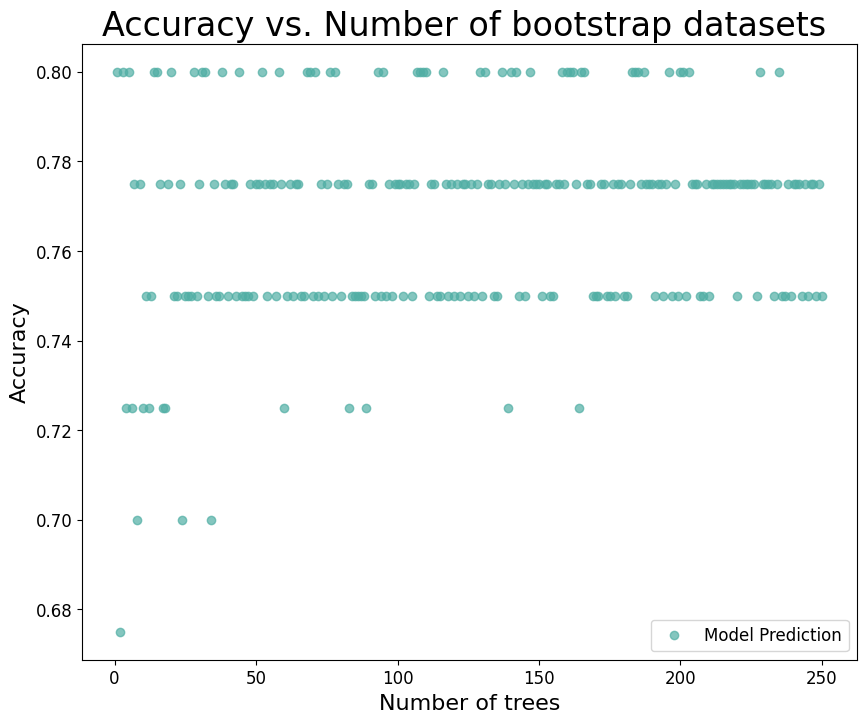

In [9]:
# Código de ayuda para graficar la precisión frente al número de árboles embolsados

n = np.linspace(1,250,250).astype(int)
acc = []
for n_i in n:
    y_pred = prediction_by_bagging(X_train, y_train, X_test, n_i)
    acc.append(np.mean(y_pred==y_test))
plt.figure(figsize=(10,8))
plt.plot(n,acc,"o",alpha=0.7,linewidth=3,color='#50AEA4', label='Model Prediction')
plt.title('Accuracy vs. Number of bootstrap datasets ',fontsize=24)
plt.xlabel('Number of trees',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.show()


## Bagging Visualization

Bagging reduce el sobreajuste, pero solo hasta cierto punto.

Varíe las variables `max_depth` y `numboot` para ver cómo el embolsado ayuda a reducir el sobreajuste con la ayuda de la siguiente visualización

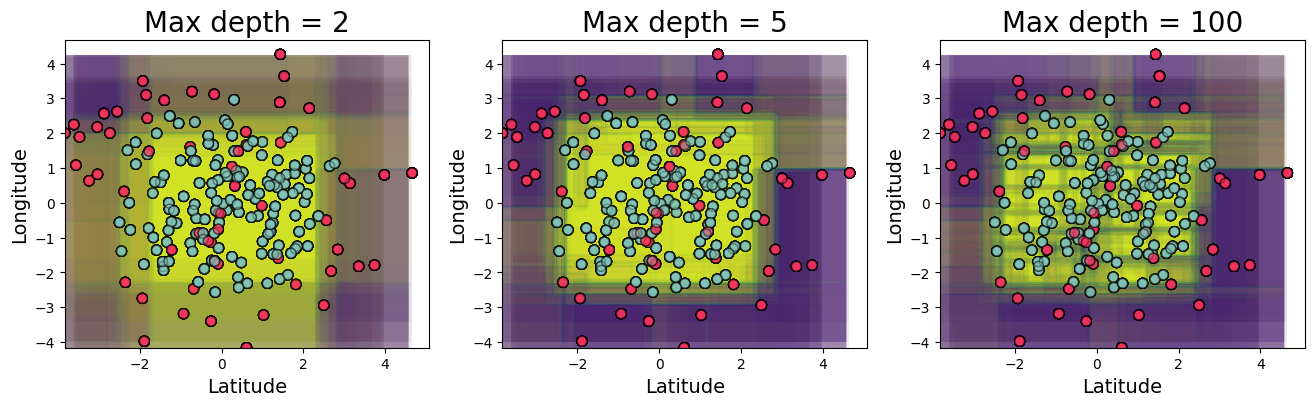

In [10]:
# Haciendo gráficos para tres valores diferentes de `max_depth`
fig,axes = plt.subplots(1,3,figsize=(16,4))

# Haz una lista de tres profundidades máximas para investigar
max_depth = [2,5,100]

# Fijar el número de bootstraps
numboot = 100

for index,ax in enumerate(axes):

    for i in range(numboot):
        df_new = df.sample(frac=1,replace=True)
        y = df_new.land_type.values
        X = df_new[['latitude', 'longitude']].values
        dtree = DecisionTreeClassifier(max_depth=max_depth[index])
        dtree.fit(X, y)
        ax.scatter(X[:, 0], X[:, 1], c=y-1, s=50,alpha=0.5,edgecolor="k",cmap=cmap_bold) 
        plot_step_x1= 0.1
        plot_step_x2= 0.1
        x1min, x1max= X[:,0].min(), X[:,0].max()
        x2min, x2max= X[:,1].min(), X[:,1].max()
        x1, x2 = np.meshgrid(np.arange(x1min, x1max, plot_step_x1), np.arange(x2min, x2max, plot_step_x2) )
        # Re-cast cada coordenada en la malla como un punto 2D
        Xplot= np.c_[x1.ravel(), x2.ravel()]

        # Predecir la clase
        y = dtree.predict( Xplot )
        y= y.reshape( x1.shape )
        cs = ax.contourf(x1, x2, y, alpha=0.02)
        
    ax.set_xlabel('Latitude',fontsize=14)
    ax.set_ylabel('Longitude',fontsize=14)
    ax.set_title(f'Max depth = {max_depth[index]}',fontsize=20)
    plt.savefig("figura.png")



## Actividad asincronica: 
## 4.1 Seleccionar un modelo
Encontrar la precision en el conjunto de entrenamiento y el conjunto de testeo para profundidades de arbol en el rango: `[2,3,4...,20]` 

Crear una grafica para el modelo de un arbol simple y otro para un modelo de Bagging. 

Mostrar en una grafica y como una tabla (`prettytable`)

## 4.2 Adaptar el modelo a los datos election_trump_clinton

Encontrar la precision en el conjunto de entrenamiento y el conjunto de testeo para profundidades de arbol en el rango: `[2,3,4...,20]` 

Crear una grafica para el modelo de un arbol simple y otro para un modelo de Bagging. 

Mostrar en una grafica y como una tabla (`prettytable`)